## Build a machine learning model to predict user will click the ad or not based on his experience and estimated salary for a given dataset

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *

# reading dataset from file & storing it as pandas dataframe
social_network_data = pd.read_csv('Social_Network_Ads.csv')
social_network_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Using already done preprocessing steps from pickle file

In [2]:
import joblib
file = open('DataProcessingAdClick.pkl', 'rb')
features = joblib.load(file)
label = joblib.load(file)
sc_x = joblib.load(file)
file.close()

#### Separating out feature colums & label column 

In [3]:
x_values = social_network_data.loc[:,features].values
y_values = social_network_data.loc[:,label].values

In [4]:
x_values = sc_x.transform(x_values)

#### Splitting dataset into train set & test set

In [5]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

### Building Decision Tree Classification model

In [125]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
classifier.fit(train_x_values, train_y_values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Storing essential objects into pickle file

In [126]:
import joblib
file = open('DCTModelAdClick.pkl', 'wb')
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [127]:
test_prediction = classifier.predict(test_x_values)

### Evaluating model against test set 

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Accuracy score: {accuracy_score(test_y_values, test_prediction)}')

Accuracy score: 0.95


In [129]:
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')

Confusion matrix:
 [[56  2]
 [ 2 20]]


### Plotting colormap for  classification

#### 1 (blue) represents user purchased &  0 (red) represents user not purchsed

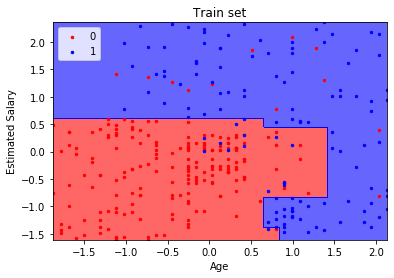

In [130]:
plot_colormap(train_x_values, train_y_values, classifier,'Train set')

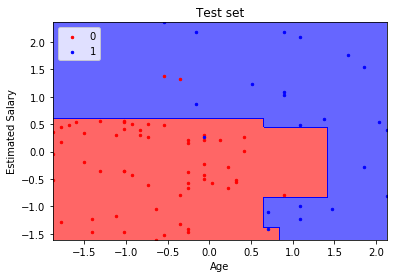

In [131]:
plot_colormap(test_x_values, test_y_values, classifier,'Test set')